### Bibliotecas

In [6]:
%matplotlib notebook

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams

### Graphics font properties

In [7]:
fontsize = 8

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "mathtext.fontset": "dejavuserif",
    "font.size": fontsize,
})

### Exemplo para análise de dominância

<IPython.core.display.Javascript object>


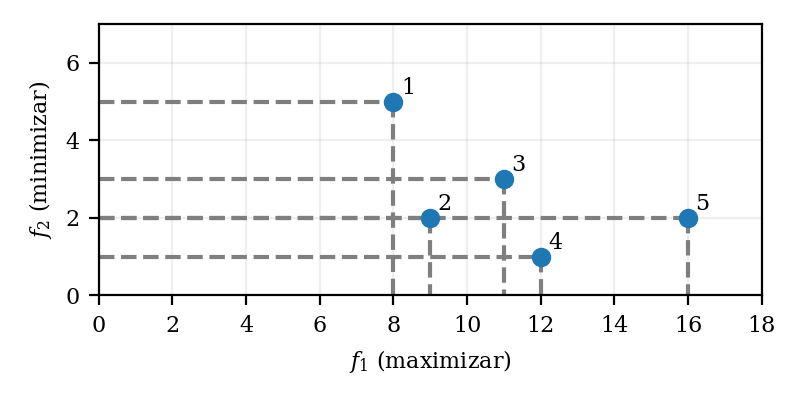

In [8]:
# Pontos a serem plotados
x = np.array([8.0, 9.0, 11.0, 12.0, 16.0])
y = np.array([5.0, 2.0, 3.0, 1.0, 2.0])

# Criando a figura
fig, ax = plt.subplots(figsize=(4, 2))

n = len(x)
for k in range(n):
    # Reta tracejada vertical
    ax.plot([x[k], x[k]], [y[k], 0.0], "--", color="C7")
    # Reta tracejada horizontal
    ax.plot([0.0, x[k]], [y[k], y[k]], "--", color="C7")
    # Rótulo do ponto
    ax.annotate(str(k + 1), (x[k] + 0.2, y[k] + 0.2))
ax.plot(x, y, "o", color="C0")

ax.set_xlim([0.0, 18.0])
ax.set_ylim([0.0, 7.0])

ax.set_xlabel(r"$ f_1 $ (maximizar)")
ax.set_ylabel(r"$ f_2 $ (minimizar)")

ax.grid(alpha=0.2)

fig.tight_layout()
# plt.savefig("exemplo_dominancia.pdf")

### Atividade prática sobre dominância

<IPython.core.display.Javascript object>


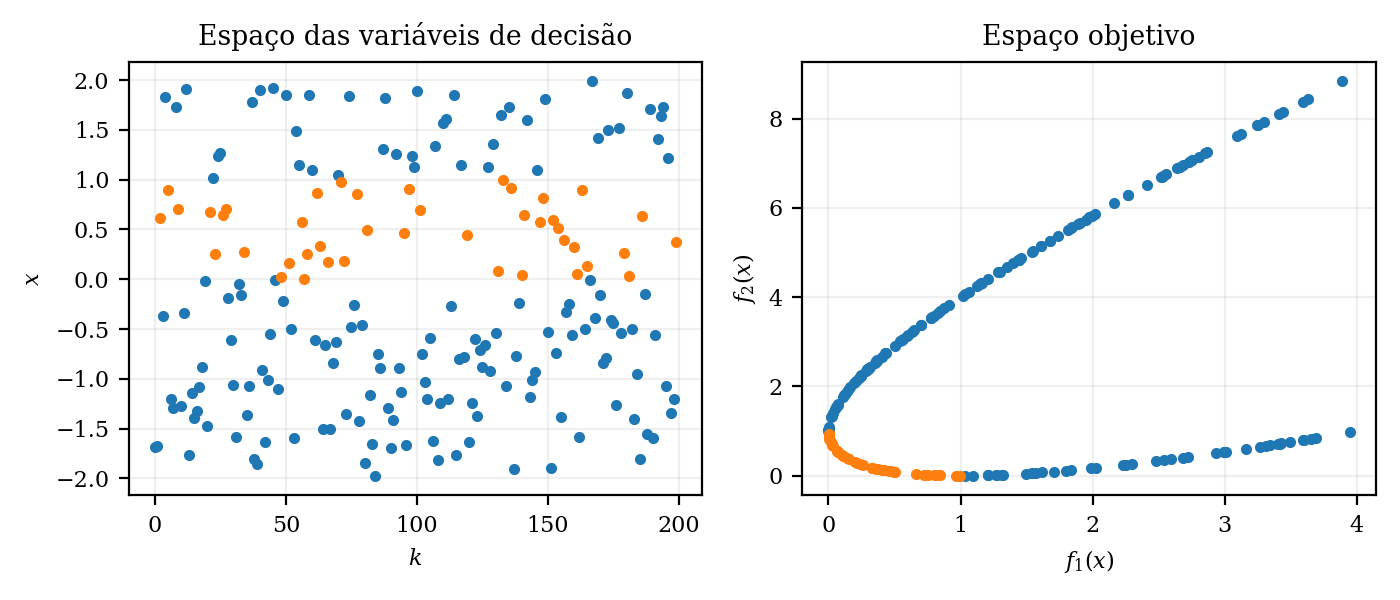

In [9]:
def f1(x):
    return x**2

def f2(x):
    return (x - 1)**2

def f(x):
    return np.array([f1(x), f2(x)])

def eh_dominado(fx1, fx2):
    if np.all(fx1 <= fx2) and np.any(fx1 < fx2):
        return True
    else:
        return False

p = 200
X = np.random.uniform(low=-2.0, high=2.0, size=p)
F = f(X)

dominado = np.zeros(p)
for i in range(p):
    for j in range(p):
        if eh_dominado(F[:, i], F[:, j]):
            dominado[j] += 1 # dominado[j] = dominado[j] + 1
            
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

for k, x in enumerate(X):
    if dominado[k] == 0:
        ax[0].plot(k, x, "o", color="C1", markersize=3)
        ax[1].plot(F[0, k], F[1, k], "o", color="C1", markersize=3)
    else:
        ax[0].plot(k, x, "o", color="C0", markersize=3)
        ax[1].plot(F[0, k], F[1, k], "o", color="C0", markersize=3)

ax[0].set_xlabel(r"$k$")
ax[0].set_ylabel(r"$x$")
ax[0].set_title(r"Espaço das variáveis de decisão")

ax[1].set_xlabel(r"$f_1(x)$")
ax[1].set_ylabel(r"$f_2(x)$")
ax[1].set_title(r"Espaço objetivo")

ax[0].grid(alpha=0.2)
ax[1].grid(alpha=0.2)

fig.tight_layout()